<a href="https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/DL%20For%20Classification/%20DL_Day6_Building_a_DL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
1. Layers
2. Sequential Model API

  2.1 Understanding a Sequential Model conceptually

  2.2 Creating a Sequential Model

  2.3 Giving names to the layers

  2.4 Adding an input

  2.5 Model Summary

  2.6 Example

3. Functional Model API 
4. Model Subclassing
5. Conclusion


**NOTE:** Multi-layer perceptron (MLP) and deep neural networks (DNN) are often used interchangeably in Deep Learning. Infact, usually Neural networks are deep (more than 1 hidden layer) and thus DNNs are simply called Neural Networks.

So there's nothing to worry about if you hear these terms being used interchangeably on the internet.

In [1]:
import numpy as np
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

## 1.Layers
The neurons in a neural network are divided into layers.

![](https://i.imgur.com/McMOhuQ.png)

While we know them with the names Input, Hidden and Output till now, Tensorflow doesn’t go by those names. It wants the user to specify the type of that particular layer.

For utilising the different types of layers we have available, Tensorflow provides a submodule called layers that we can import as follows:

`from tensorflow.keras import layers`


**Dense Layer**


*   A dense layer is just a regular layer of neurons in a neural network. 
*   It is the most common and frequently used layer.
*   Look at the middle layer in the previous image. Each neuron receives input from all the neurons in the previous layer and is thus called densely connected or dense.




There are two ways to create a model using Layers:
1. Sequential Models
2. Functional Models

Let's have a look at both of them.

## 2.Sequential Model API
The sequential model API is the **simplest** and is the API that we recommend, especially when getting started.

You can think of a Sequential model as a **plain stack of layers** 

It is referred to as “sequential” because it involves defining a Sequential class and adding layers to the model one by one in a linear manner, from input to output.




**Importing Libraries**

* The Sequential library from tensorflow.keras is used to build Sequential models.

* layers is used to create each layer of the model.

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

### 2.1 Understanding a Sequential Model conceptually

The following Sequential model:

In [3]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

is equivalent to this function:

In [4]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))  # <-- notice how layers are stacked 

Notice how **one layer is stacked on top of another** in the last line. That's exactly what a Sequential Model does.

### 2.2 Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [5]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

You can also create a Sequential model incrementally via the `add()` method:

In [6]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

### 2.3 Giving name to the layers.
You can even add a `name` argument to name the different layers:

In [7]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

### 2.4 Adding an Input 
Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights since the shape of the weights depends on the shape of the inputs.

When you create a
Sequential model without an input shape, it isn't "built": it has no weights. The weights are created
when the model first sees some input data.

One easy way to do that is to start your model by passing an Input object to your model, so that it knows its input shape from the start:

In [8]:
# Method 1
model = keras.Sequential()
model.add(keras.Input(shape=(4,))) # Why (4,) and not 4? Because we want our input to be a Vector (1D Tensor)
model.add(layers.Dense(2, activation="relu"))

In [9]:
# Method 2
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))  # Combining the 2 code lines into 1

In general, it's a recommended best practice to always specify the input shape of a Sequential model in advance if you know what it is.

### 2.5 Model Summary
Tensorflow Keras provides a way to summarize a model. It can be very useful when building a Sequential model incrementally to be able to display the summary of the model.

The summary is textual and includes information about:

1. The layers and their order in the model.
2. The output shape of each layer.
3. The number of parameters (weights) in each layer.
4. The total number of parameters (weights) in the model.

The summary can be created by calling the summary() function on the model as `model.summary`.

Note: The Input Layer is not displayed in summary because it merely decides the input shape and is not necessarily a layer.

In [10]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In the above summary you can see that:
* The name of our model is "sequential_4"
* It has one layer of type Dense
* The output shape of the layer is (None,2). 

  The output shapes are given by `(batch_size, units)`. Since we haven't specified a batch size and have the no. of units as 2, the output shape became (None,2).
* The number of parameters is 10. 
The number of parameters in a Dense Layer are calculated as :


  ```
        number_parameters = output_size * (input_size + 1) 
  ```
  So in this case, # parameters = 2 * (4+1) = 2*5 = 10


You don't need to worry about thr difference between trainable and non-trainable parameters right now.

**The number along with the layer i.e the 7 in dense_7 or along with model name i.e 4 in "sequential_4" is automatically generated by Tensorflow Keras, starting from 1. Each time you create a new layer, it is assigned a new number so that the autogenerated names of layers are unique and do not clash between each other.**

### 2.6 Plotting a Model
It's always nice to visualise the models and see how each layer is connected to another. This can be done with the `plot_model` function from `tensorflow.keras.utils`.

Currently, our model only has 1 Dense Layer so the displayed architecture will be very simple.

Plotting models is particularly useful in case of large models involving many interconnected layers.

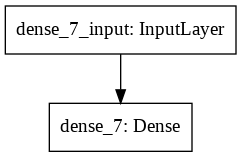

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model)

### 2.7 Example
The example below defines a Sequential MLP model that:
* accepts 8 inputs, 
* has one hidden layer with 10 nodes (i.e. neurons) defined manually
* and then an output layer with one node to predict a numerical value.

In [12]:
# example of a model defined with the sequential api

# define the model
model = Sequential()
model.add(layers.Dense(10, input_shape=(8,)))  
model.add(layers.Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Note that the visible layer of the network is defined by the “input_shape” argument on the first hidden layer. That means in the above example, the model expects the input for one sample to be a vector of eight numbers.

The sequential API is easy to use because you keep calling model.add() until you have added all of your layers.



Instead of typing layers.Dense again and again, we can import Dense from tensorflow.keras.layers and use it directly.

For example, here is a deep MLP with five hidden layers. 

In [13]:
# example of a model defined with the sequential api
from tensorflow.keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_11 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_12 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 11,781
Trainable params: 11,781
Non-trainable params: 0
__________________________________________________

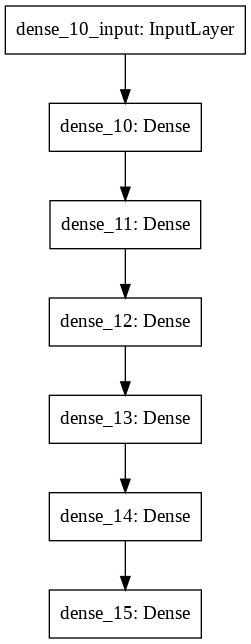

In [14]:
plot_model(model)

## 3.Functional Model API (Advanced)
The functional API is **more complex** but is also **more flexible**.
Unlike the stack of layers in Sequential API, the functional API is a way to build graphs of layers.

It involves clearly connecting the output of one layer to the input of another layer. Each connection is specified.

Let's take the same example as above and create a Functional model:

1. First, an input layer must be defined via the Input class, and the shape of an input sample is specified.

In [15]:
from tensorflow.keras import Input

# define the layers
x_in = Input(shape=(8,))

2. You create a new node in the graph of layers by calling a layer on this inputs object.
Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer. This will return a reference to the output connection in this new layer.

In [16]:
dense = layers.Dense(64, activation="relu")
x = layers.Dense(10)(x_in)

3. We can then connect this to an output layer in the same manner.


In [17]:
x_out = layers.Dense(1)(x)

4. Once connected, we define a Model object and specify the input and output layers. The complete example is listed below.

In [18]:
# example of a model defined with the functional api
from tensorflow.keras import Model

# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# print summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Remember that the model summary in Sequential API didn't display the input layer? 

The Functional API displays the Input Layer in model summary as well.

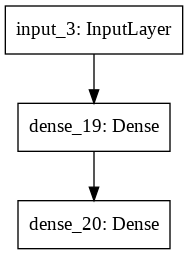

In [19]:
plot_model(model)

As such, the Functional API allows for more complicated model designs, such as models that may have multiple input paths (separate vectors) and models that have multiple output paths (e.g. a word and a number).

The functional API can be a lot of fun when you get used to it.

## 4.Model Subclassing
There is another method of creating a model with Keras but that is a bit more advanced and currently out of scope.

## 5.Conclusion
That's all with the methods of building Deep Learning Models!

We suggest using Sequential Model API - a comparatively easier method for building all your Deep Learning models 